## **IPL OMS EDA**

In [1]:
## import necessary packages 

import csv
import math
import time
import warnings
import operator
import statistics
import seaborn as sns
import pandas as pd
import numpy as np
import geopy.distance
import matplotlib.pyplot as plt

from dateutil.parser import parse
from datetime import datetime
from scipy import stats
from IPython.display import display_html
from multiprocessing import Pool
from sklearn.model_selection import train_test_split

plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')
%matplotlib inline

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.options.display.float_format = '{:.2f}'.format

In [2]:
## Load analytical dataset

df_ipl_ads = pd.read_csv('gs://aes-datahub-0002-curated/Outage_Restoration/Historical_Data/Master_Dataset/OMS_IPL_OUTAGE_BASECREW_10222020.csv', index_col=0)

In [3]:
print(df_ipl_ads.shape)

(110983, 162)


In [4]:
df_ipl_ads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110983 entries, 0 to 111082
Columns: 162 entries, OUTAGE_ID to UNIT
dtypes: bool(53), float64(73), int64(19), object(17)
memory usage: 98.8+ MB


In [5]:
df_ipl_ads.describe()

,OUTAGE_ID,INCIDENT_ID,CIRCT_ID,SUBST_ID,CALL_QTY,DOWNSTREAM_CUST_QTY,KEY_CUST_QTY,CUST_QTY,TTR,LAT,LONG,NO_OF_POWER_OUT_CLUE_PER_DAY,NO_OF_OPEN_DEVICE_CLUE_PER_DAY,NO_OF_IVR_CLUE_PER_DAY,NO_OF_ANIMAL_CAUSE_PER_DAY,NO_OF_WIRE_OCCURN_PER_DAY,Hour_Sin,Hour_Cos,RANK_SUBSEQUENT_OUTAGES,LIVE_OUTAGE,Outages_in_last_1hr,Outages_in_last_2hr,Outages_in_last_3hr,Outages_in_last_4hr,Outages_in_last_5hr,Outages_in_last_6hr,Outages_in_last_7hr,Outages_in_last_8hr,Outages_in_last_9hr,Outages_in_last_10hr,Live_outage_group,Priority_Customer_Qty,Dis_From_Live_Centriod_div_Cust_qty,Priority_Dist_Customer_Qty,cldCvrAvg,cldCvrMax,cldCvrMin,dewPtAvg,dewPtMax,dewPtMin,feelsLikeAvg,feelsLikeMax,feelsLikeMin,heatIndexAvg,heatIndexMax,heatIndexMin,mslPresAvg,mslPresMax,mslPresMin,precip,radSolarAvg,radSolarMax,radSolarTot,relHumAvg,relHumMax,relHumMin,sfcPresAvg,sfcPresMax,sfcPresMin,snowfall,spcHumAvg,spcHumMax,spcHumMin,tempAvg,tempMax,tempMin,wetBulbAvg,wetBulbMax,wetBulbMin,windChillAvg,windChillMax,windChillMin,windDir100mAvg,windDir80mAvg,windDirAvg,windSpd100mAvg,windSpd100mMax,windSpd100mMin,windSpd80mAvg,windSpd80mMax,windSpd80mMin,windSpdAvg,windSpdMax,windSpdMin,tempRange,windSpdRange,sfcPresRange,cldCvrRange,relHumRange,relHumRatio,sfcPresRatio,Active_no_of_trucks_per_day
count,110983.00,110983.00,110983.00,110983.00,110983.00,110983.00,110983.00,110983.00,110983.00,110983.00,110983.00,110983.00,110983.00,110983.00,110983.00,110983.00,110983.00,110983.00,110983.00,110983.00,110983.00,110983.00,110983.00,110983.00,110983.00,110983.00,110983.00,110983.00,110983.00,110983.00,110983.00,110983.00,110983.00,110983.00,110983.00,110983.00,110983.00,110983.00,110983.00,110983.00,110983.00,110983.00,110983.00,110983.00,110983.00,110983.00,110983.00,110983.00,110983.00,110983.00,110983.00,110983.00,110983.00,110983.00,110983.00,110983.00,110983.00,110983.00,110983.00,110983.00,110983.00,110983.00,110983.00,110983.00,110983.00,110983.00,110983.00,110983.00,110983.00,110983.00,110983.00,110983.00,110983.00,110983.00,110983.00,110983.00,110983.00,110983.00,110983.00,110983.00,110983.00,110983.00,110983.00,110983.00,110983.00,110983.00,110983.00,110983.00,110983.00,110983.00,110983.00,70918.00
mean,2001881927.28,2000850856.63,2889.46,262.36,11.14,55.39,0.38,55.39,264.56,39.80,-86.15,60.07,8.08,24.90,4.08,15.41,-0.08,-0.29,30.74,31.37,7.66,12.24,15.90,18.88,21.53,23.96,26.20,28.39,30.48,32.50,9049.05,42.47,2.71,217.24,53.87,86.56,19.93,49.93,55.34,44.47,58.21,68.98,47.87,60.12,70.17,50.48,1015.04,1018.21,1011.66,0.27,192.13,664.69,4611.06,73.68,91.25,53.97,986.72,989.84,983.39,0.05,9.33,11.06,7.74,59.38,68.56,50.44,54.25,59.56,48.18,57.48,67.37,47.83,202.95,203.02,202.70,11.73,17.54,6.30,11.89,17.84,6.37,6.50,11.80,2.21,18.12,9.59,6.45,66.63,37.28,1.84,1.01,55.31
std,400037.06,324969.55,1758.91,144.97,36.26,227.76,1.76,227.76,692.32,0.09,0.11,111.10,8.52,37.79,4.05,39.29,0.70,0.65,61.72,95.93,23.23,34.33,42.45,47.89,52.30,56.30,59.73,63.34,66.95,70.82,6436.41,89.92,17.09,779.21,31.82,27.05,31.75,17.90,17.02,18.93,22.01,23.01,21.87,19.27,21.06,18.44,6.48,6.31,7.14,0.53,107.37,284.53,2576.80,12.37,8.39,16.28,6.31,5.99,7.17,0.49,4.86,5.37,4.43,18.51,19.46,18.39,16.79,15.86,17.92,21.29,21.46,21.82,87.35,87.37,86.84,5.37,7.28,4.46,5.42,7.33,4.50,3.45,5.38,2.39,6.52,4.29,4.62,34.94,13.87,0.54,0.00,28.65
min,2001309371.00,2000383861.00,105.00,15.00,1.00,1.00,0.00,1.00,0.02,35.24,-86.76,0.00,0.00,0.00,0.00,0.00,-1.00,-1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,-14.30,-8.20,-23.10,-30.50,-17.90,-35.50,-9.30,0.80,-14.30,991.00,994.90,985.50,0.00,2.40,15.00,31.00,32.00,44.30,14.00,960.80,964.80,952.20,0.00,0.50,0.60,0.30,-9.30,0.80,-14.30,-9.70,-0.50,-14.70,-30.50,-17.90,-35.50,0.00,0.00,0.00,1.50,2.80,0.00,1.50,2.80,0.00,0.30,1.40,0.00,1.50,1.10,0.90,0.00,0.00,1.00,1.00,1.00
25%,2001517625.00,2000551133.50,1810.00,175.00,1.00,3.00,0.00,3.00,48.05,39.74,-86.22,14.00,3.00,6.00,1.00,1.00,-0.71,-0.87,6.00,1.00,0

In [6]:
print(list(df_ipl_ads.columns))

['OUTAGE_ID', 'INCIDENT_ID', 'STRCTUR_NO', 'EVENT', 'CREATION_DATETIME', 'ENERGIZED_DATETIME', 'CIRCT_ID', 'DNI_EQUIP_TYPE', 'SUBST_ID', 'CALL_QTY', 'DOWNSTREAM_CUST_QTY', 'KEY_CUST_QTY', 'ETR_DATETIME', 'CUST_QTY', 'DAY_FLAG', 'TTR', 'POLE_CLUE_FLG', 'PART_LIGHT_CLUE_FLG', 'EMERGENCY_CLUE_FLG', 'POWER_OUT_CLUE_FLG', 'OPEN_DEVICE_CLUE_FLG', 'TREE_CLUE_FLG', 'WIRE_DOWN_CLUE_FLG', 'IVR_CLUE_FLG', 'EQUIPMENT_CLUE_FLG', 'TRANSFORMER_CLUE_FLG', 'OH_CAUSE_FLG', 'UG_CAUSE_FLG', 'ANIMAL_CAUSE_FLG', 'WEATHER_CAUSE_FLG', 'WEATHER_COLD_CAUSE_FLG', 'PUBLIC_CAUSE_FLG', 'WEATHER_LIGHTNING_CAUSE_FLG', 'WEATHER__SNOW_CAUSE_FLG', 'WEATHER__WIND_CAUSE_FLG', 'WEATHER__HEAT_CAUSE_FLG', 'CUST_REQUEST_CAUSE_FLG', 'WEATHER__FLOOD_CAUSE_FLG', 'STREET_CAUSE_FLG', 'SUBSTATION_CAUSE_FLG', 'TREE_CAUSE_FLG', 'MISCELLANEOUS_CAUSE_FLG', 'NO_CAUSE_FLG', 'PLANNED_CAUSE_FLG', 'NO_OUTAGE_CAUSE_FLG', 'FUSE_OCCURN_FLG', 'CUST_EQUIP_OCCURN_FLG', 'POLE_OCCURN_FLG', 'TRANSFORMER_OCCURN_FLG', 'METER_OCCURN_FLG', 'SERVICE_OCCU

## **Mean Time of Failure of TREE CAUSES**

In [7]:
df_tree = df_ipl_ads[(df_ipl_ads.TREE_CAUSE_FLG == True)]
df_tree.shape

(24435, 162)

In [8]:
df_tree['CREATION_DATETIME_LAG1'] = df_tree['CREATION_DATETIME'].shift(1)

In [9]:
# create lag column to calculate time between failure for Tree causes

df_tree['CREATION_DATETIME'] = pd.to_datetime(df_tree['CREATION_DATETIME'], errors='coerce')
df_tree['CREATION_DATETIME_LAG1'] = pd.to_datetime(df_tree['CREATION_DATETIME_LAG1'], errors='coerce')

df_tree['Time_between_failure'] = (df_tree.CREATION_DATETIME - df_tree.CREATION_DATETIME_LAG1) / pd.Timedelta(hours=1)

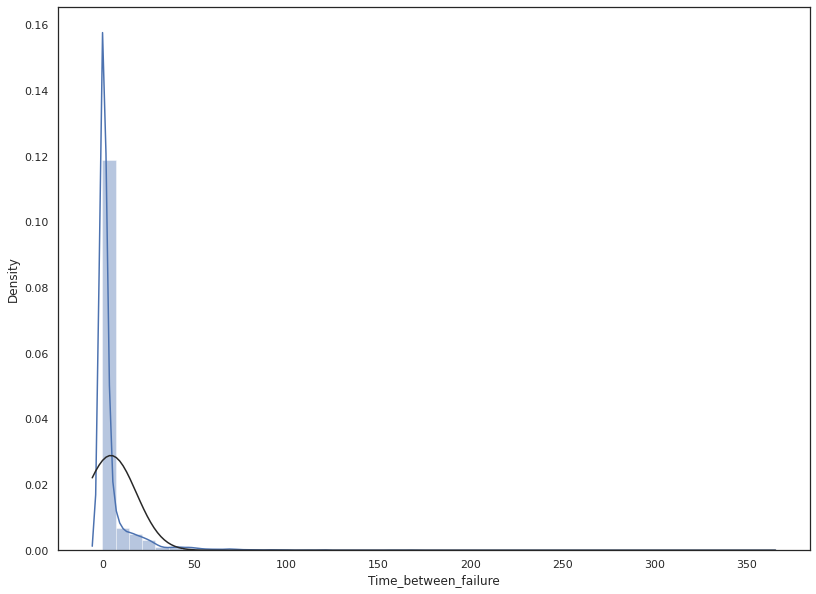

<Figure size 864x720 with 0 Axes>

In [10]:
sns.set(rc={'figure.figsize':(12,10)})
sns.set_style("white")

from scipy.stats import norm

sns.distplot(df_tree['Time_between_failure'], fit=norm);
fig = plt.figure()

In [11]:
def change_event(row):
    if row != 'OTHERS':
        return row
    else : 
        return 'BLUE SKY'

df_tree['EVENT'] = df_tree.apply(lambda x: change_event(x['EVENT']), axis=1)

In [12]:
df_tree['EVENT'].value_counts()

BLUE SKY    13952
STORM       10483
Name: EVENT, dtype: int64

<AxesSubplot:xlabel='Time_between_failure', ylabel='Active_no_of_trucks_per_day'>

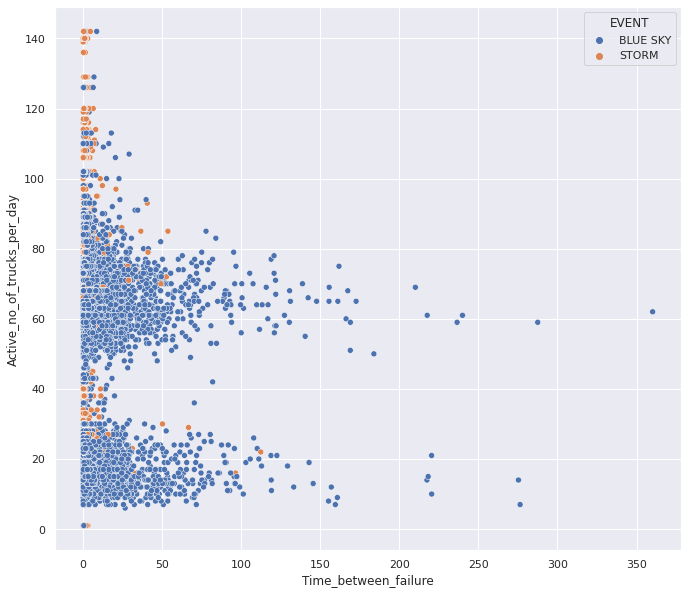

In [13]:
sns.set(style="white")
sns.set(rc={'figure.figsize':(10,10)})
sns.scatterplot(data=df_tree, x="Time_between_failure", y='Active_no_of_trucks_per_day', hue='EVENT')

<AxesSubplot:xlabel='Time_between_failure', ylabel='DOWNSTREAM_CUST_QTY'>

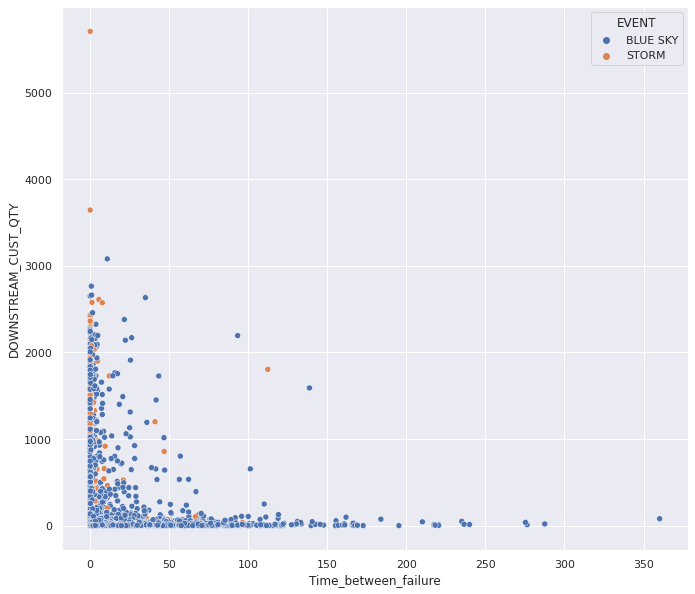

In [14]:
sns.set(style="white")
sns.set(rc={'figure.figsize':(10,10)})
sns.scatterplot(data=df_tree, x="Time_between_failure", y='DOWNSTREAM_CUST_QTY', hue='EVENT')

In [18]:
df_tree['Month'] = df_tree['CREATION_DATETIME'].dt.month
df_tree['Year'] = df_tree['CREATION_DATETIME'].dt.year
df_tree['Date'] = df_tree['CREATION_DATETIME'].dt.date

df_tree = df_tree[df_tree['Year'] >= 2015]

df_tree['Period'] = df_tree.Year.astype(str) + "-" + df_tree.Month.astype(str)

df_outages = df_tree.groupby(['Year', 'Month'],as_index=False).agg({'OUTAGE_ID' : 'count', 'Time_between_failure' : 'mean'})
df_outages.rename({'OUTAGE_ID' : 'No_of_outages', 'Time_between_failure' : 'Mean_time_between_failure'}, axis=1, inplace=True)
df_outages['Period'] = df_outages.Year.astype(str) + "-" + df_outages.Month.astype(str)
df_outages

,Year,Month,No_of_outages,Mean_time_between_failure,Period
0,2015,1,30,27.76,2015-1
1,2015,2,21,30.62,2015-2
2,2015,3,37,21.08,2015-3
3,2015,4,85,8.02,2015-4
4,2015,5,95,8.21,2015-5
5,2015,6,244,2.94,2015-6
6,2015,7,762,0.98,2015-7
7,2015,8,96,6.97,2015-8
8,2015,9,110,7.22,2015-9
9,2015,10,102,7.33,2015-10


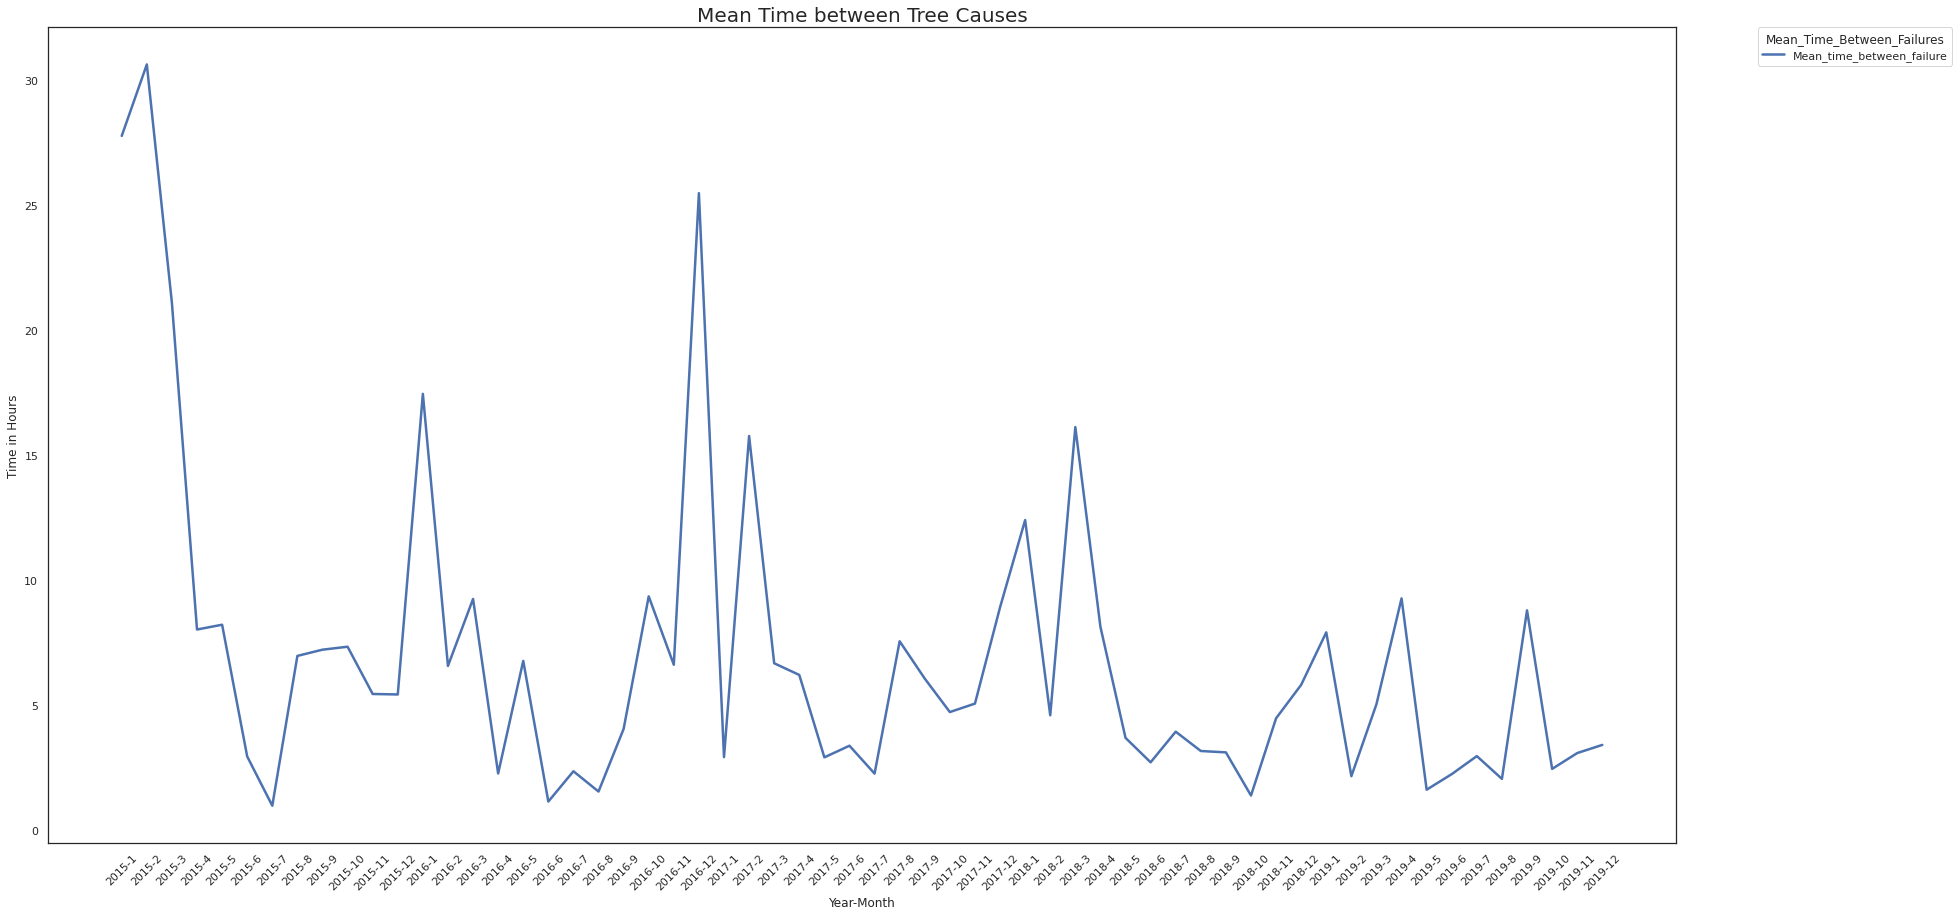

In [37]:
sns.set(rc={'figure.figsize':(26,15)})
sns.set_style("white")
with plt.rc_context({'lines.linewidth': 2.5}):
    ax = sns.lineplot(x='Period', y='value', hue='variable', 
                  data=pd.melt(df_outages[['Period', 'Mean_time_between_failure']], ['Period']))
#     new_labels = ['Weather_Source_windSpdAvg', 'Weather_Source_windSpdMax', 'Weather_Source_windSpdMin', 'Darksky_windSpeed', 'ClimaCell_wind_speed.value']
#     ax.set_xticklabels()
sns.set(rc={"axes.titlesize":20,'figure.facecolor':'white','axes.facecolor':'white'},style="white")
ax.set(xlabel='Year-Month', ylabel='Time in Hours',title="Mean Time between Tree Causes")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Mean_Time_Between_Failures')


In [33]:
df_outages_v1 = df_tree.groupby(['Date'],as_index=False).agg({'OUTAGE_ID' : 'count', 'Time_between_failure' : 'mean', 'Active_no_of_trucks_per_day' : 'mean'})
df_outages_v1.rename({'OUTAGE_ID' : 'No_of_outages', 'Time_between_failure' : 'Mean_Time_Of_Failure'}, axis=1, inplace=True)
df_outages_v1

,Date,No_of_outages,Mean_Time_Of_Failure,Active_no_of_trucks_per_day
0,2015-01-02,2,65.28,68.00
1,2015-01-03,2,15.91,14.00
2,2015-01-04,2,7.52,13.00
3,2015-01-05,2,15.17,66.00
4,2015-01-08,1,58.08,68.00
...,...,...,...,...
1344,2019-11-28,19,1.11,68.00
1345,2019-11-29,3,4.87,36.00
1346,2019-11-30,21,1.52,84.00
1347,2019-12-01,9,2.43,82.00


<AxesSubplot:xlabel='Mean_Time_Of_Failure', ylabel='Active_no_of_trucks_per_day'>

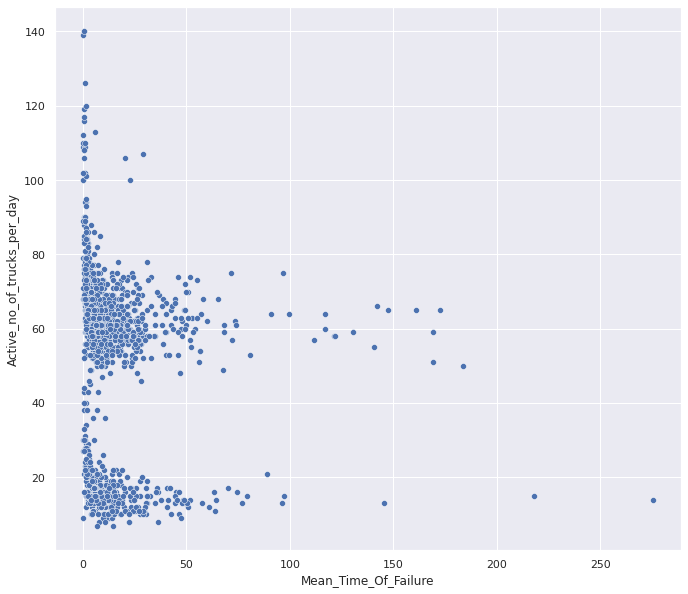

In [34]:
sns.set(style="white")
sns.set(rc={'figure.figsize':(10,10)})
sns.scatterplot(data=df_outages_v1, x="Mean_Time_Of_Failure", y="Active_no_of_trucks_per_day")

<AxesSubplot:xlabel='Mean_Time_Of_Failure', ylabel='No_of_outages'>

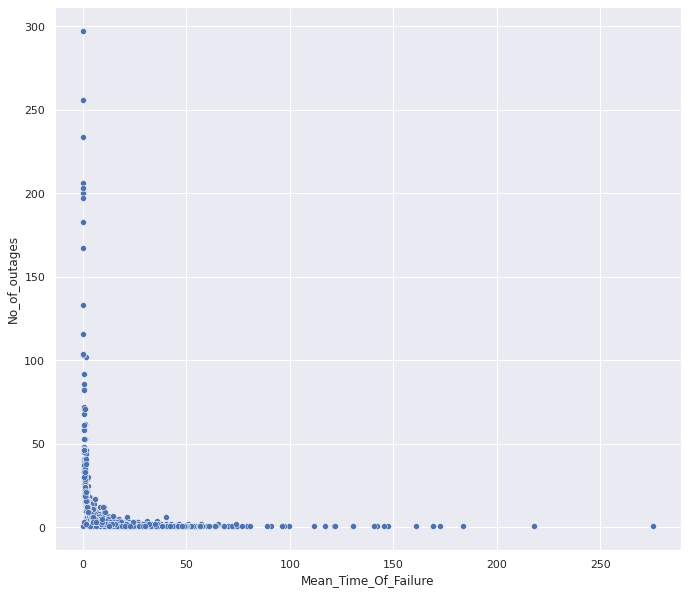

In [35]:
sns.set(style="white")
sns.set(rc={'figure.figsize':(10,10)})
sns.scatterplot(data=df_outages_v1, x="Mean_Time_Of_Failure", y="No_of_outages")

In [36]:
df_tree['DNI_EQUIP_TYPE'].value_counts()

FUSE          6659
1TBOH         2793
CUT            452
SWITCH         439
SSUB           290
RECL           196
2TBOD           88
PADELB          82
3TBOH           34
2TBPAR          33
1TPUG           31
SECTZ           16
PO              13
3TPUG           12
FPO             10
SB_FUSE          6
ASWITCH          5
OHPRIM           4
TAPSWITCH        2
PAR_SWITCH       1
USWITCH          1
BPSWITCH         1
Name: DNI_EQUIP_TYPE, dtype: int64